# Handle Missing Time Value

1. DataFrame.reindex
2. DataFrame.resample

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.DataFrame({
    "pdate": ["2019-12-01", "2019-12-02", "2019-12-04", "2019-12-05"],
    "pv": [100, 200, 400, 500],
    "uv": [10, 20, 40, 50],
})

df

,pdate,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-05,500,50


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='pdate'>

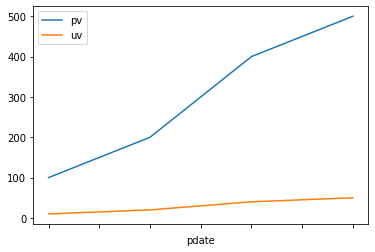

In [3]:
df.set_index("pdate").plot()

**Missing the 2019-12-03 value**

###### pd.reindex

In [4]:
df_date = df.set_index("pdate")
df_date

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [5]:
df_date.index

Index(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='object', name='pdate')

In [6]:
df_date = df_date.set_index(pd.to_datetime(df_date.index))
df_date

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [7]:
df_date.index

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='datetime64[ns]', name='pdate', freq=None)

In [8]:
pdates = pd.date_range(start="2019-12-01", end="2019-12-05")
pdates

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df_date_new = df_date.reindex(pdates, fill_value=0)
df_date_new

,pv,uv
2019-12-01,100,10
2019-12-02,200,20
2019-12-03,0,0
2019-12-04,400,40
2019-12-05,500,50


<AxesSubplot:>

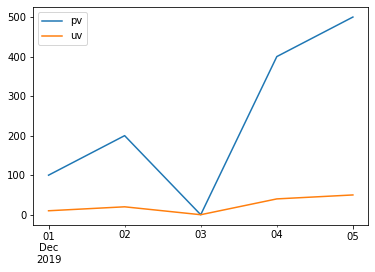

In [10]:
df_date_new.plot()

###### pd.resample

In [11]:
df

,pdate,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-05,500,50


In [12]:
df_new2 = df.set_index(pd.to_datetime(df["pdate"])).drop("pdate", axis=1)
df_new2

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [13]:
df_new2 = df_new2.resample("D").mean().fillna(0)
df_new2

,pv,uv
pdate,,
2019-12-01,100.0,10.0
2019-12-02,200.0,20.0
2019-12-03,0.0,0.0
2019-12-04,400.0,40.0
2019-12-05,500.0,50.0


In [14]:
df_new2.resample("2D").mean()

,pv,uv
pdate,,
2019-12-01,150.0,15.0
2019-12-03,200.0,20.0
2019-12-05,500.0,50.0


In [15]:
help(pd.DataFrame.resample)

Help on function resample in module pandas.core.generic:

resample(self, rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)
    Convenience method for frequency conversion and resampling of time
    series.  Object must have a datetime-like index (DatetimeIndex,
    PeriodIndex, or TimedeltaIndex), or pass datetime-like values
    to the on or level keyword.
    
    Parameters
    ----------
    rule : string
        the offset string or object representing target conversion
    axis : int, optional, default 0
    closed : {'right', 'left'}
        Which side of bin interval is closed. The default is 'left'
        for all frequency offsets except for 'M', 'A', 'Q', 'BM',
        'BA', 'BQ', and 'W' which all have a default of 'right'.
    label : {'right', 'left'}
        Which bin edge label to label bucket with. The default is 'left'
        for all frequency offsets except for 'M'